In [2]:
%run -i 'ABS_model_and_fitting_functions.ipynb'

In [5]:
an_full = prepare_data("data_npy/45_dd.npy", 0, 0, chop=False)
lc_full = prepare_data("data_npy/45.npy", 0, 0, chop=False)

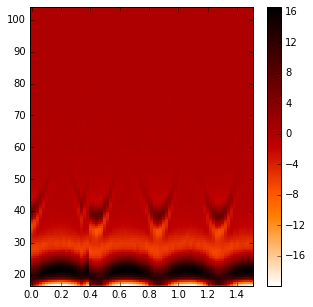

In [6]:
plot_datascan(an_full)

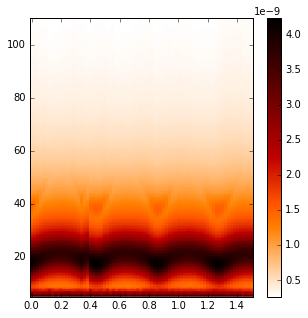

In [7]:
plot_datascan(lc_full)

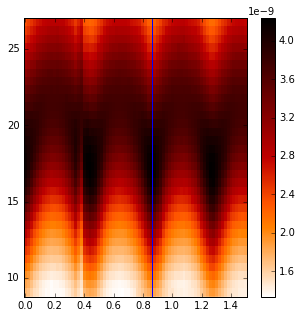

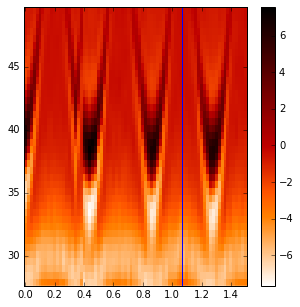

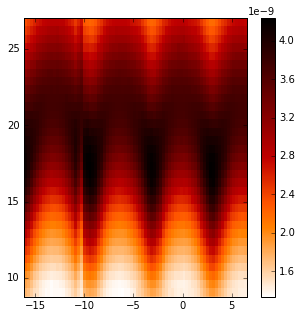

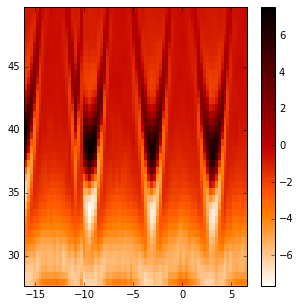

In [19]:
lc = prepare_data("data_npy/45.npy", 7, 40, chop=True)
an = prepare_data("data_npy/45_dd.npy", 20, 60, chop=True)
a, b = calibration_phase_axis(lc, an, 20, 30, 35, 45, plot=True)
plot_datascan(lc)
plot_datascan(an)

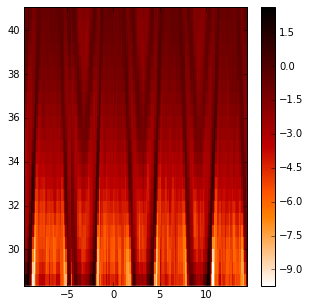

In [144]:
plot_datascan(an2)

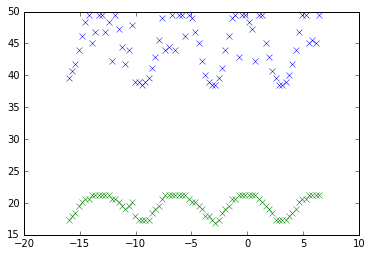

In [29]:
lc_line = peak_positions(lc)
abs_line = peak_positions(an)
# This leaves some spurious points close to flux = 0 and flux = 1 for the ABS line
plt.plot(an['y'], abs_line, 'x')
plt.plot(lc['y'], lc_line, 'x')

In [31]:
lc_line = zip(lc['y'][20:], lc_line[20:])
abs_line = zip(np.concatenate((an['y'][20:28], an['y'][37:50], an['y'][58:71])),
               np.concatenate((abs_line[20:28], abs_line[37:50], abs_line[58:71])))

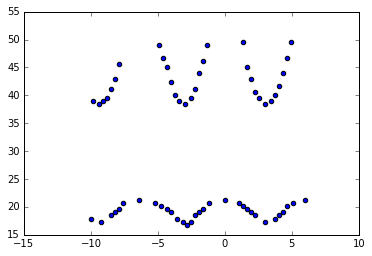

In [32]:
lines = merge_points([lc_line, abs_line])
phase, frequency = zip(*lines)
plt.scatter(phase, frequency)

In [47]:
np.argmax(np.diff(frequency))

31

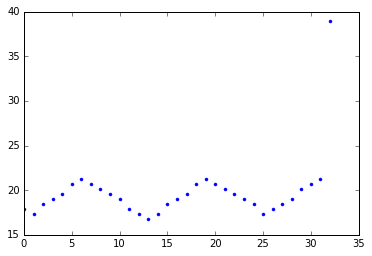

In [49]:
plt.plot(frequency[:33], '.')

## Fit with one free parameter

In [50]:
%%capture
p0 = [0.6]
fit_1 = fit_abs_model(lines, 33, p0, Ej=39.8, Ec=5.65, Ea=28.95)

In [51]:
fit_1['popt']

array([ 0.62677566])

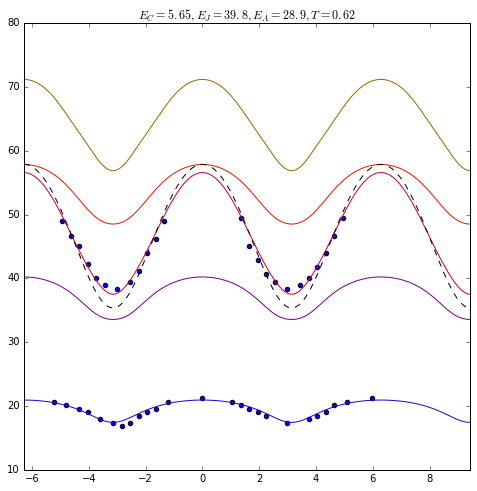

In [52]:
plot_fit_results(fit_1, lines, Ej=39.8, Ec=5.65, Ea=28.95, flux_final=4*np.pi, n_fluxes=200)

## Fit with two free parameters

In [53]:
%%capture
p0 = [26, 0.5]
fit_2 = fit_abs_model(lines, 33, p0, Ej=39.8, Ec=5.65)

In [54]:
fit_2['popt']

array([ 27.53178945,   0.55620048])

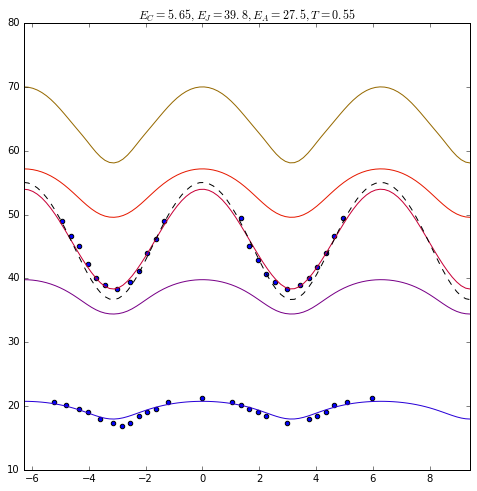

In [55]:
plot_fit_results(fit_2, lines, Ej=39.8, Ec=5.65)

## Fit with three free parameters

In [62]:
%%capture
p0 = [5.65, 30, 0.7]
fit_3 = fit_abs_model(lines, 33, p0, Ej=39.8)

In [63]:
fit_3['popt']

array([  5.92214218,  27.57967153,   0.56093019])

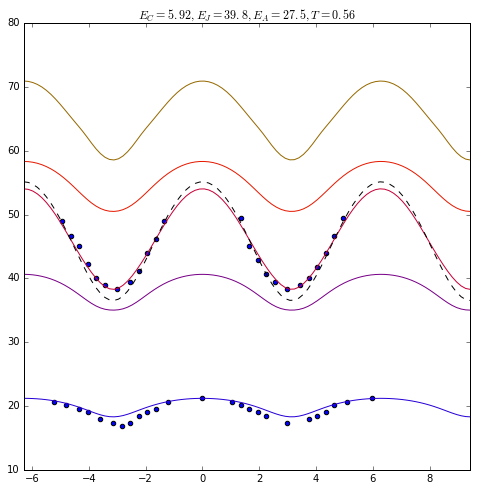

In [64]:
plot_fit_results(fit_3, lines, Ej=39.8)

## Fit with four free parameters

In [68]:
%%capture
p0 = [5.65, 30, 30, 0.6]
fit_4 = fit_abs_model(lines, 33, p0, max_tol=2e-6)

In [69]:
fit_4['popt']

array([  4.51911422,  49.99996514,  27.60202882,   0.55583811])

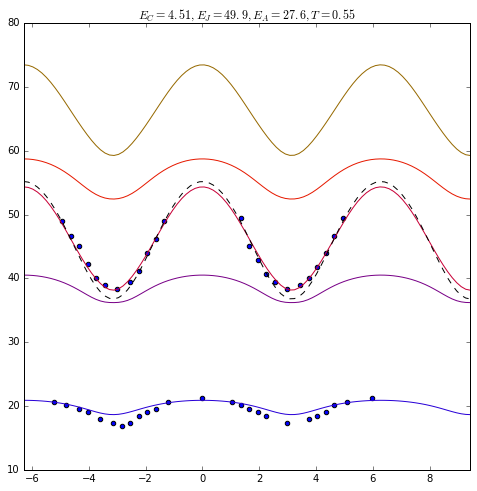

In [70]:
plot_fit_results(fit_4, lines)